# Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from math import pi,acos
import seaborn as sns
import os
from scipy.constants import epsilon_0 as epsilon
%matplotlib inline

In [32]:
#Run this to reset the results
results= pd.DataFrame(columns = ['LC Name', 'Temperature', 'Applied Voltage','Rise Time','Decay Time','Total Response Time','Visco-Elastic Ratio'])

In [33]:
#Loading the data
path="/home/avinash/Desktop/Projects/Liquid_Crystal_Analysis/data/Batch2" #Enter Loaction WHere CSV data is kept


name_of_LC="Pure LC"# Change this to show type of LC
thickness= 7.01E-6 #in Metres
area=77E-6 #in Metres^2
empty_c=99.6E-12 #in Farad
wavelength=633E-9 #in metre
#Dielectric Anisotropy depends on temperature

temps=['26','28','30','32']
voltages=['4','5','6','7','8','9','10']
#epsilon_a=[1,1,1,1]

if not os.path.exists(path + "/Analysis") :
    os.mkdir (path + "/Analysis")
output_path=path+"/Analysis"

# Analysis of Each Voltage Case

File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis
File Exists. Start Analysis


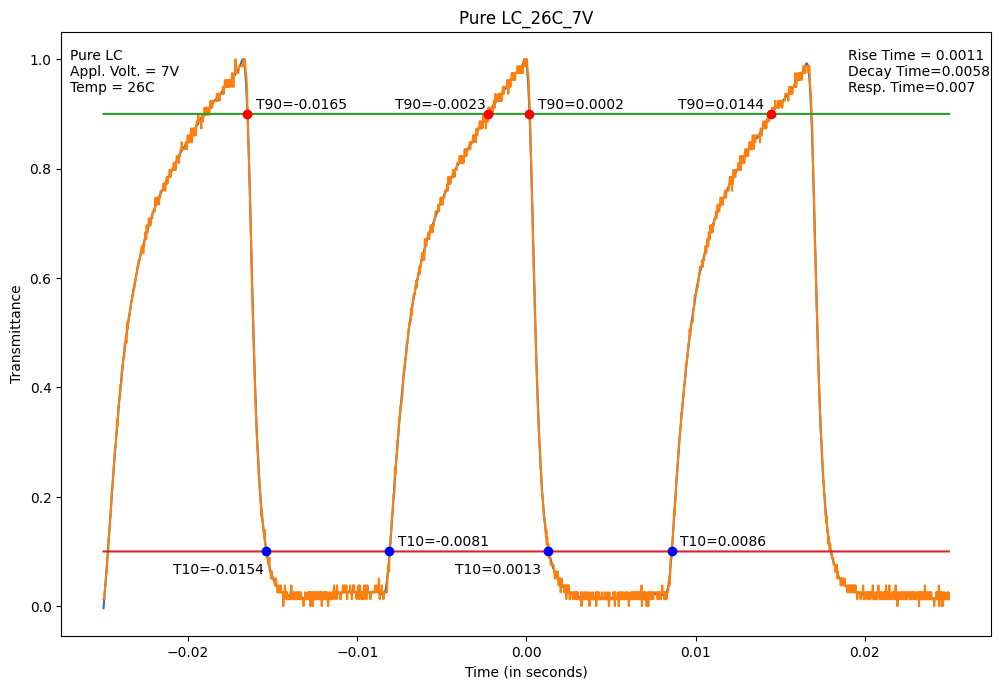

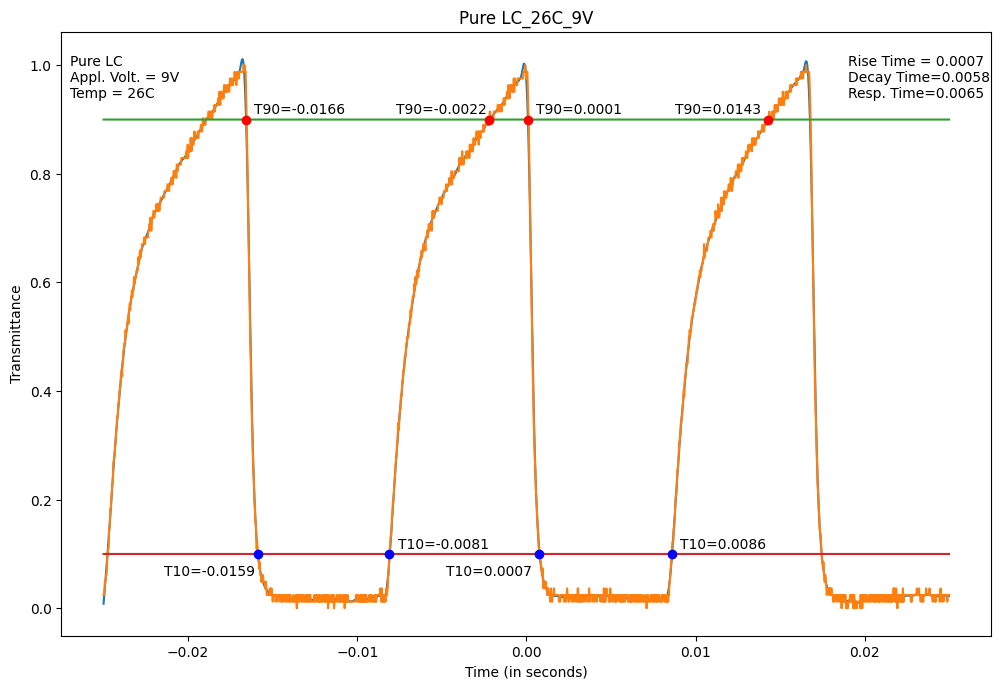

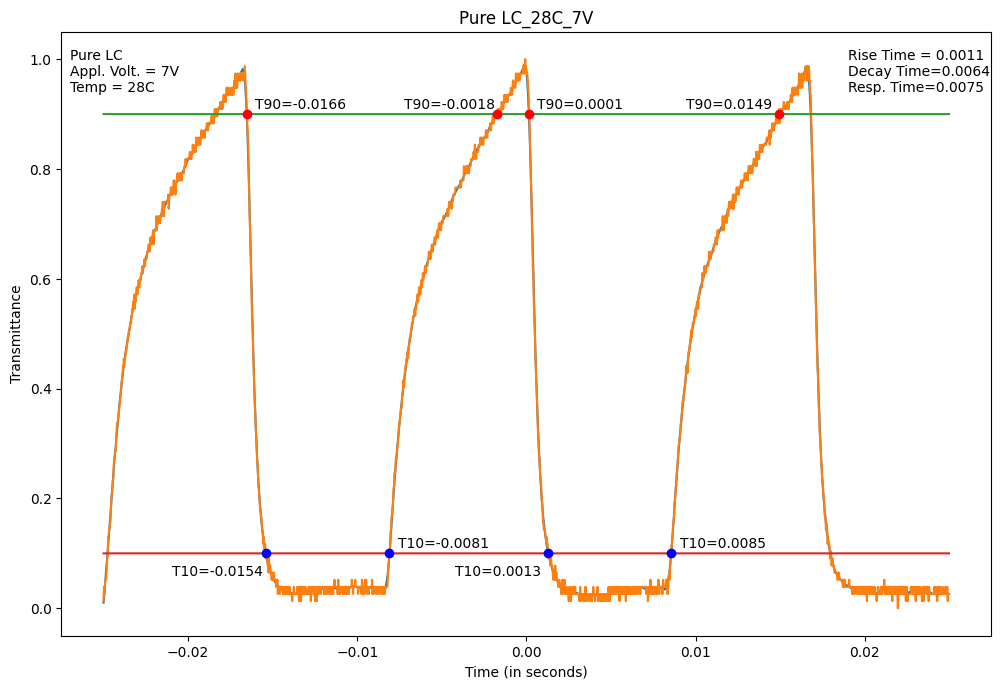

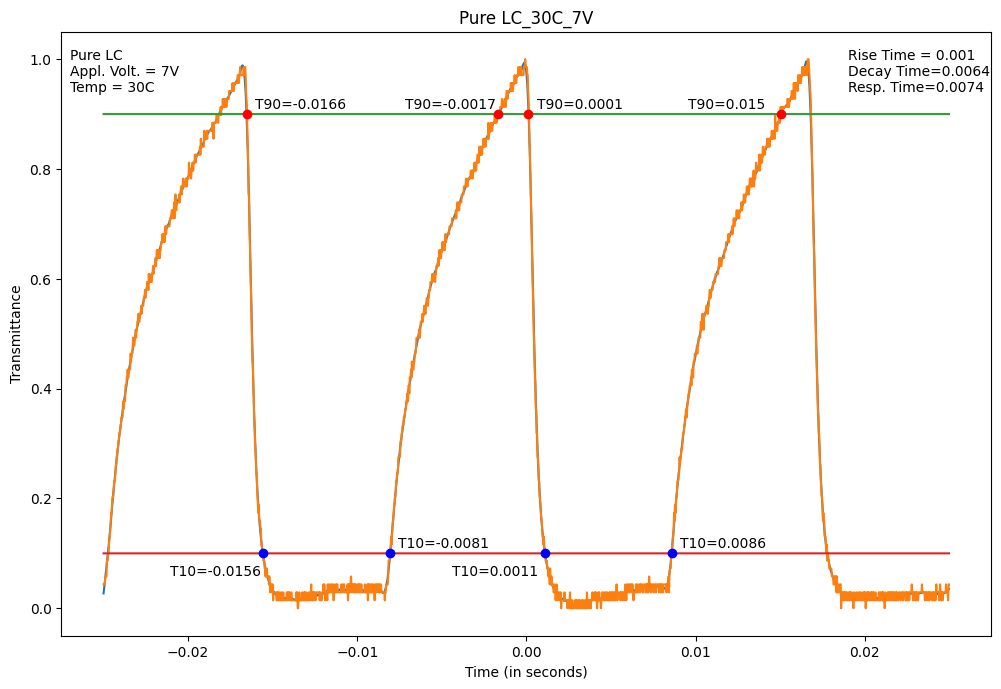

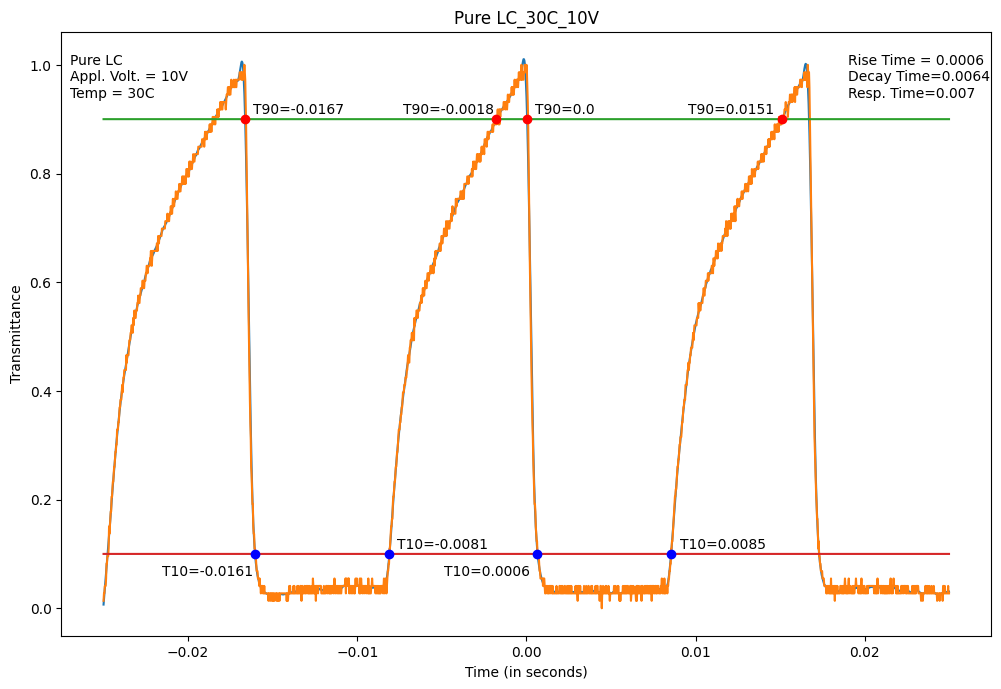

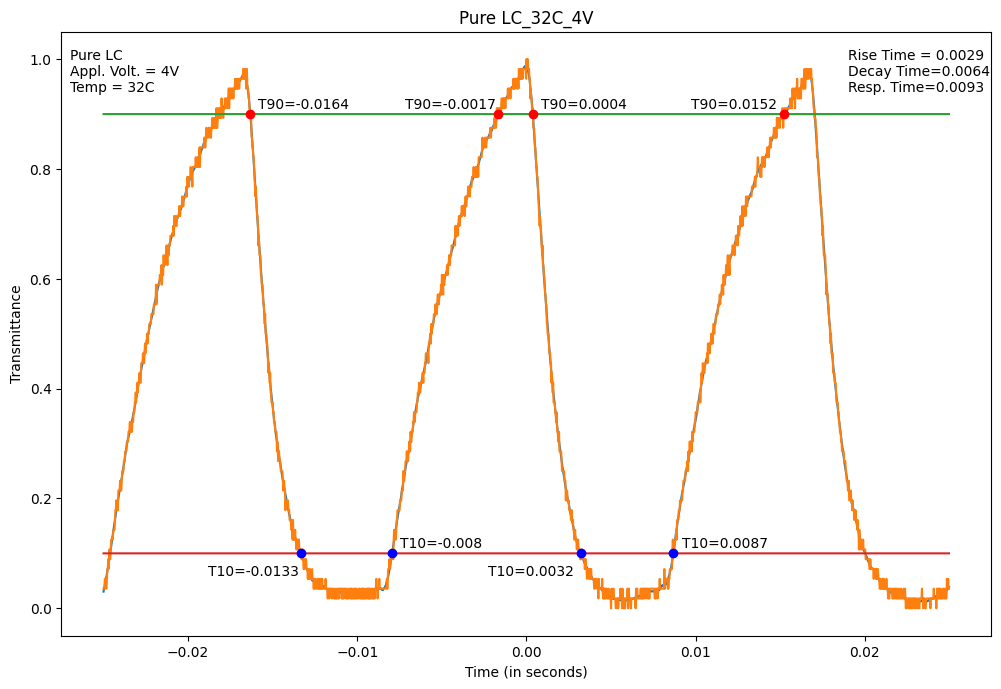

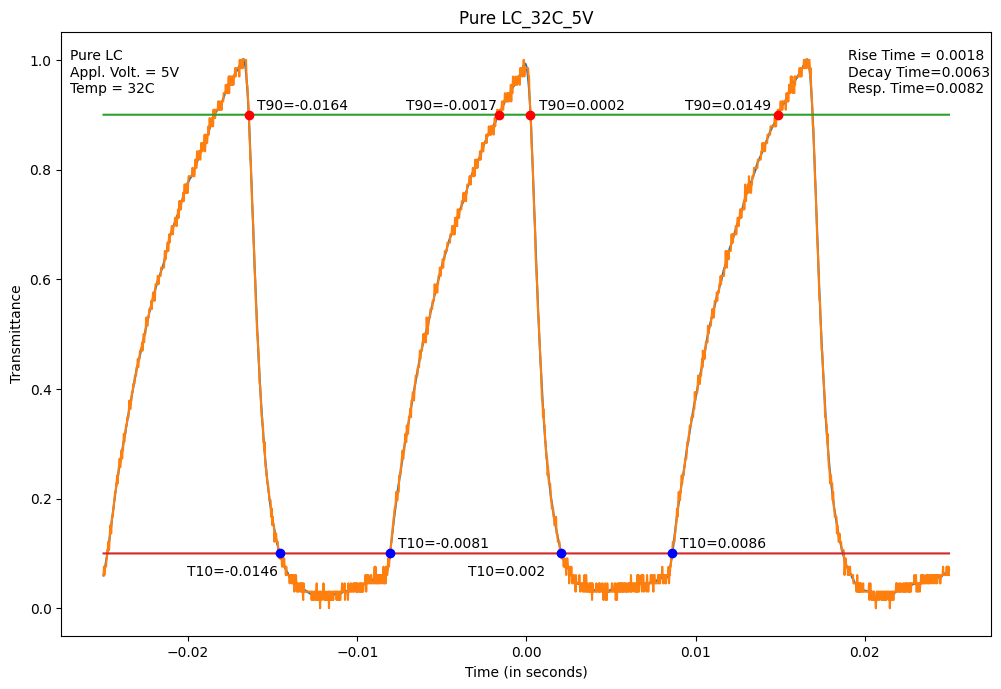

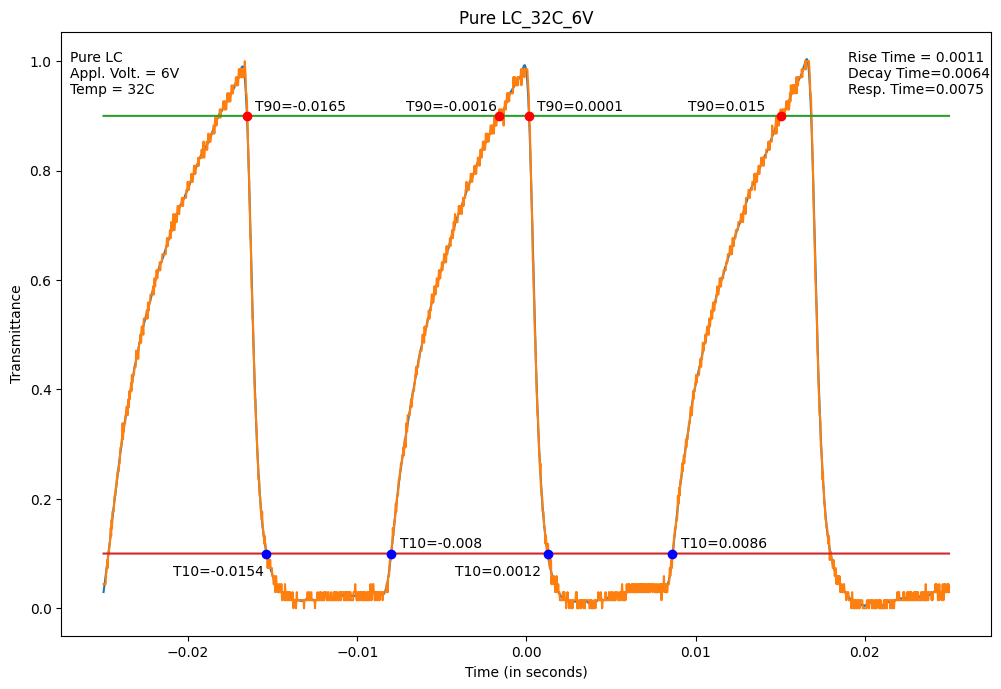

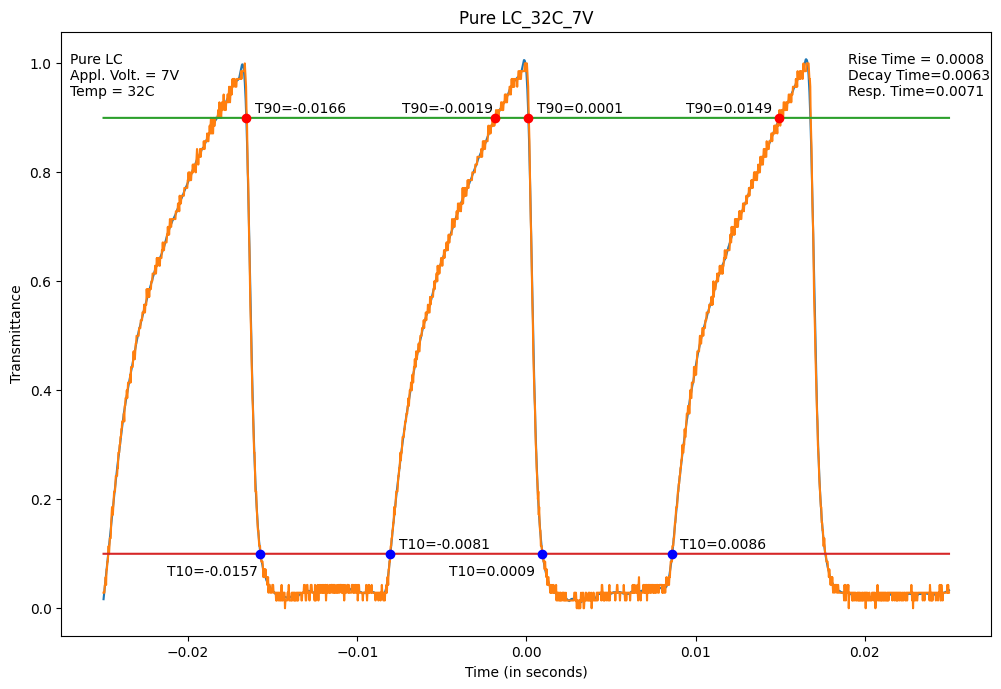

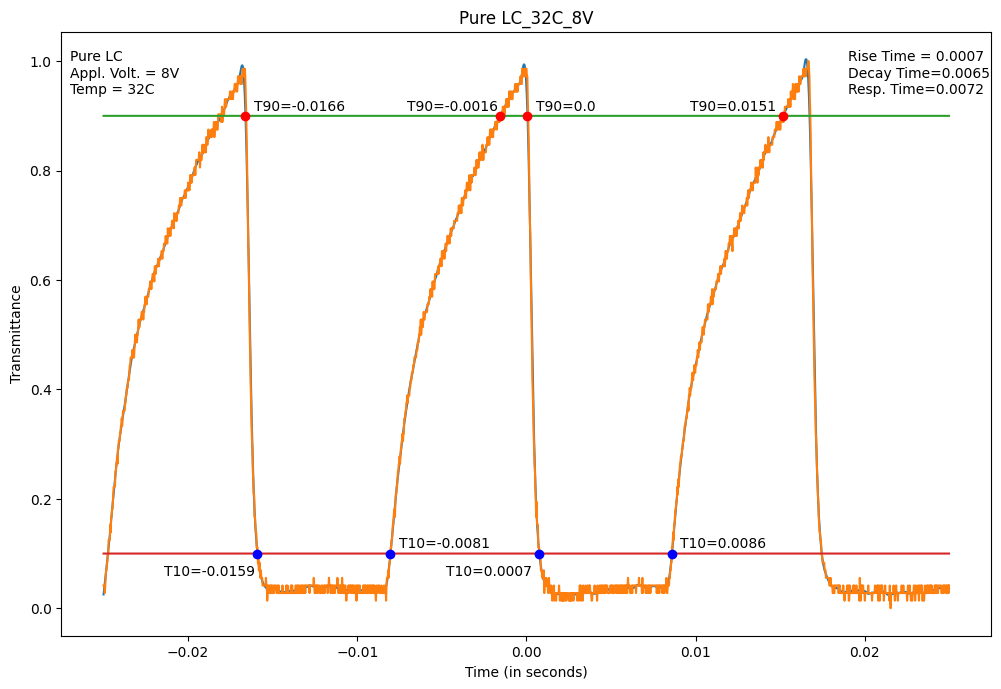

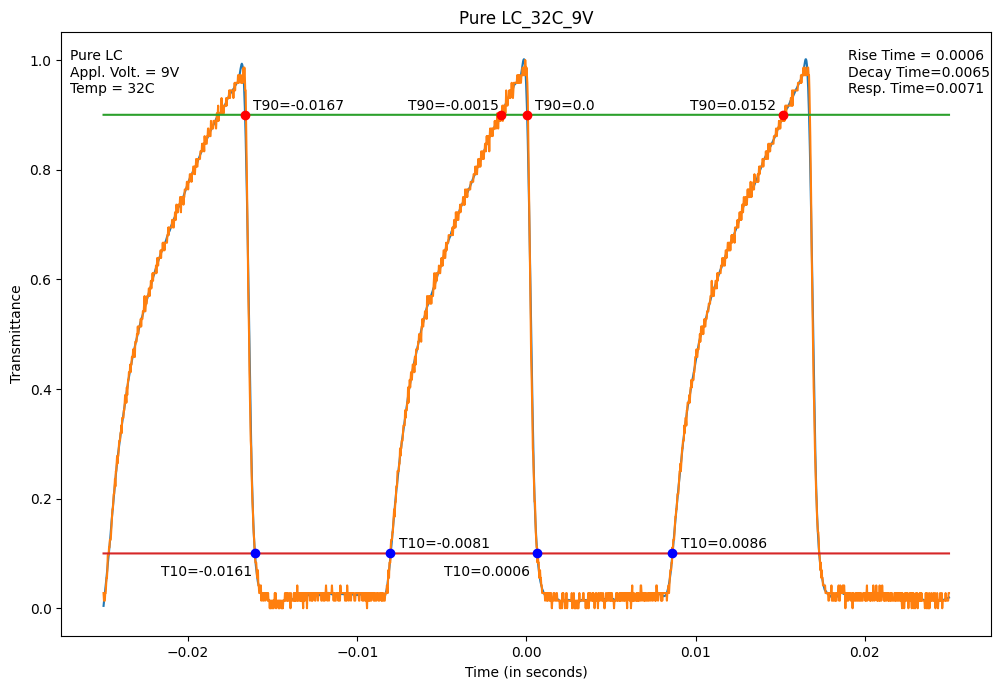

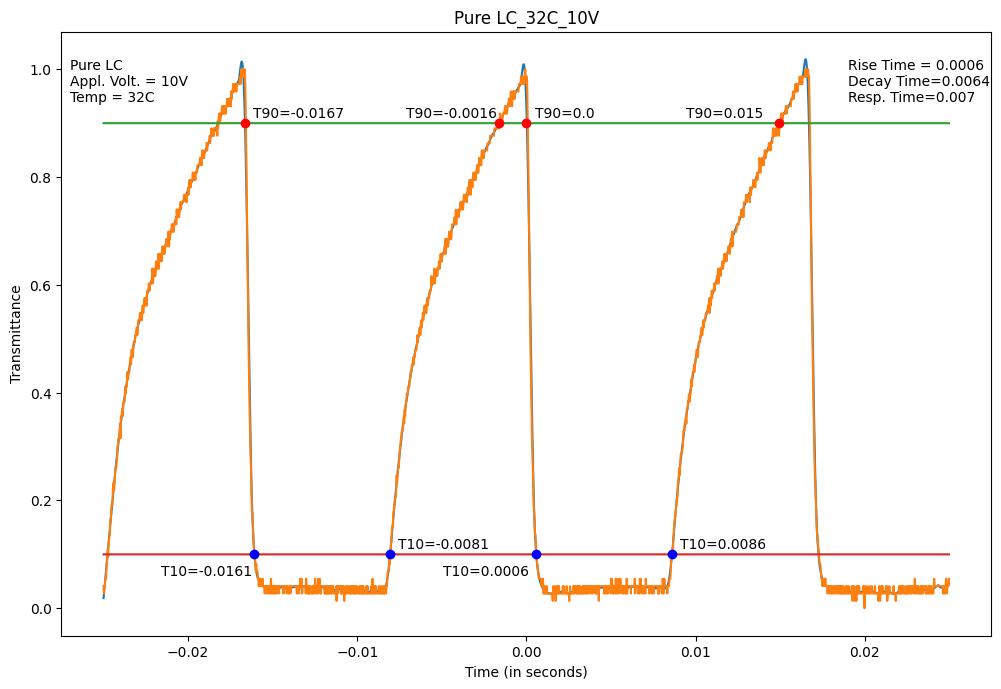

In [34]:
if not os.path.exists(output_path+"/TransmittancevsTime") :
    os.mkdir (output_path+"/TransmittancevsTime")
for temp in temps:
    for voltage in voltages:
        try :
            #temp=str(temp)
            #voltage=str(voltage)
            input_path=path+"/"+temp+"_"+voltage+"_2.csv"
            df=pd.read_csv(input_path,skiprows=1)
            #Normalizing the Volt to represent transmittance
            df.Volt=(df.Volt-df.Volt.min())/(df.Volt.max()-df.Volt.min())
        except :
          print ("Incorrect CSV directory or filename")
          continue
        else:
            print("File Exists. Start Analysis")
        plt.figure(figsize=(12, 8), dpi=100, linewidth=0.1)
        plt.xlabel("Time (in seconds)")
        plt.ylabel("Transmittance")

        #Have set the window size as a constant = 33. If the number of intersections on
        #the 0.9 line or 0.1 line are more than 6, then icncrease window size
        window_size =33
        smooth=savgol_filter(df.Volt,window_size,2) #Creating a smoothened Curve us SavGol filter with window size 25 

        plt.plot(df.second,smooth) #Printing the smooth curve
        plt.plot(df.second,df.Volt)#Printing the actual curve

        plt.plot(df.second,0.9*np.ones(df.second.shape)) #Printing horizontal line at 0.9
        plt.plot(df.second,0.1*np.ones(df.second.shape)) #Printing horizontal line at 0.1

        #Finding position where the curve closses the 0.9 transmittance
        idx = np.argwhere(np.diff(np.sign(smooth - 0.9))).flatten()
        if(len(idx)!=6):
            print("Error in top. Number of points greater than 6. Increase window size and retry")
            exit(1)
        idx=idx[1:5] #Eliminating First and last points
        plt.plot(df.second[idx], 0.9*np.ones(idx.size), 'ro') #Plotting Points of intersection
        #print(len(idx))
        idx_top=idx
        for i in range(len(idx)):
            plt.annotate("T90="+str(round(df.second[idx[i]],4)),(df.second[idx[i]], 0.9),xytext =(df.second[idx[i]]+0.0005-max(0,0.006*pow(-1,i+1)), 0.91))


        #Finding position where the curve closses the 0.1 transmittance
        idx = np.argwhere(np.diff(np.sign(smooth - 0.1))).flatten()
        if(len(idx)!=6):
            print("Error in bot. Number of points greater than 6. Increase window size and retry")
            exit(1)
        idx=idx[1:5] #Eliminating First and last points
        plt.plot(df.second[idx], 0.1*np.ones(idx.size), 'bo') #Plotting Points of intersection
        #print(len(idx))
        idx_bot=idx
        for i in range(len(idx)):
            plt.annotate("T10="+str(round(df.second[idx[i]],4)),(df.second[idx[i]], 0.1),xytext =(df.second[idx[i]]+0.0005-max(0,0.006*pow(-1,i)), 0.11-max(0,0.05*pow(-1,i))))

        #Calculating RiseTime and DecayTime (average of 2 sets)
        rise_time=((df.second[idx_bot[0]]-df.second[idx_top[0]])+(df.second[idx_bot[2]]-df.second[idx_top[2]]))/2
        decay_time=((df.second[idx_top[1]]-df.second[idx_bot[1]])+(df.second[idx_top[3]]-df.second[idx_bot[3]]))/2
        response_time=rise_time+decay_time
        #Printing the times
        #print("Rise Time = ",rise_time,"seconds")
        #print("Decay Time = ",decay_time,"seconds")
        #print("Response Time = ",response_time,"seconds")
        plt.annotate("Rise Time = "+str(round(rise_time,4)),xy=(0.019,1))
        plt.annotate("Decay Time="+str(round(decay_time,4)),xy=(0.019,0.97))
        plt.annotate("Resp. Time="+str(round(response_time,4)),xy=(0.019,0.94))
        plt.annotate(name_of_LC,xy=(-0.027,1))
        plt.annotate("Appl. Volt. = "+voltage+"V",xy=(-0.027,0.97))
        plt.annotate("Temp = "+temp+"C",xy=(-0.027,0.94))
        plt.title(name_of_LC+"_"+temp+"C_"+voltage+"V")
        plt.savefig(output_path+"/TransmittancevsTime/"+temp+"_"+voltage+".jpg", dpi=300,bbox_inches='tight')
        #plt.show()
        results=results.append({'LC Name':name_of_LC, 'Temperature':temp, 'Applied Voltage':voltage,'Rise Time':rise_time,'Decay Time':decay_time,'Total Response Time': response_time,'Visco-Elastic Ratio':decay_time*pi**2/thickness**2},ignore_index=True)
            

In [35]:
#If you are happy with the results, you can write it to a csv file.
results.to_csv(output_path+"/"+"RespTimevsAppVolt.csv", index=False)

In [36]:
results=pd.read_csv(output_path+"/RespTimevsAppVolt.csv")
results.tail()

LC Name  Temperature  Applied Voltage  Rise Time  Decay Time  \
23  Pure LC           32                6   0.001125    0.006400   
24  Pure LC           32                7   0.000837    0.006275   
25  Pure LC           32                8   0.000700    0.006525   
26  Pure LC           32                9   0.000588    0.006537   
27  Pure LC           32               10   0.000550    0.006400   

    Total Response Time  Visco-Elastic Ratio  
23             0.007525         1.285416e+09  
24             0.007112         1.260310e+09  
25             0.007225         1.310522e+09  
26             0.007125         1.313032e+09  
27             0.006950         1.285416e+09

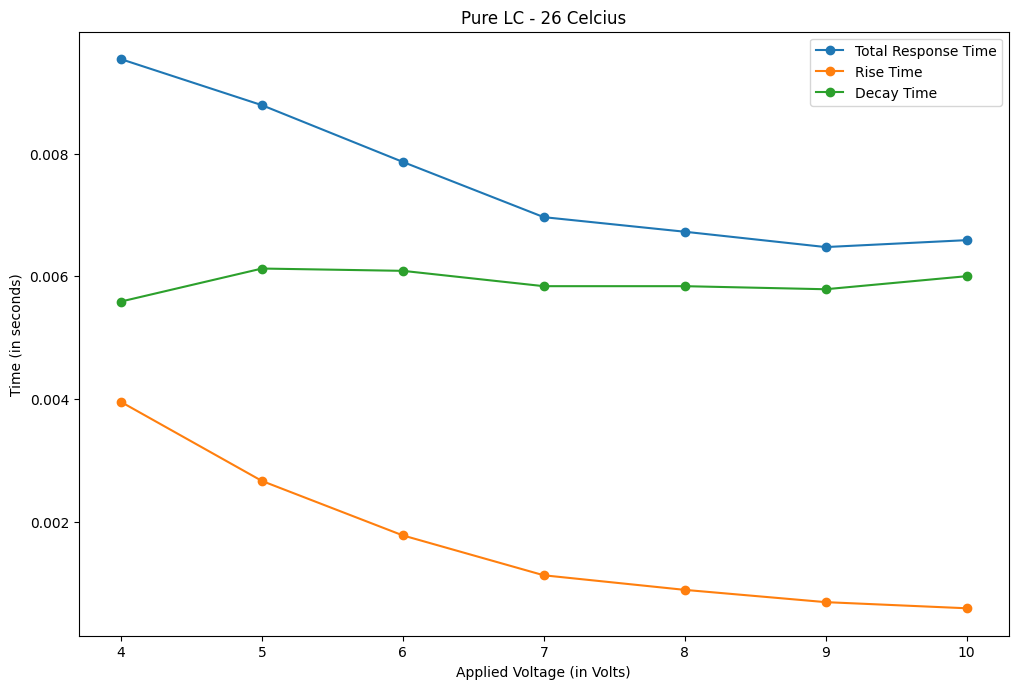

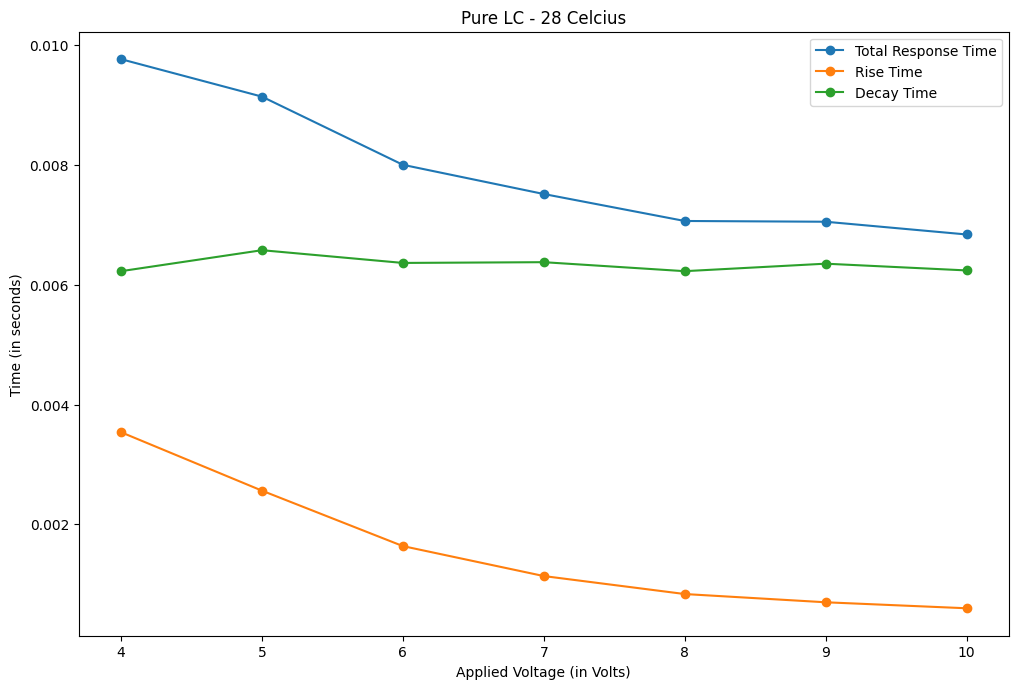

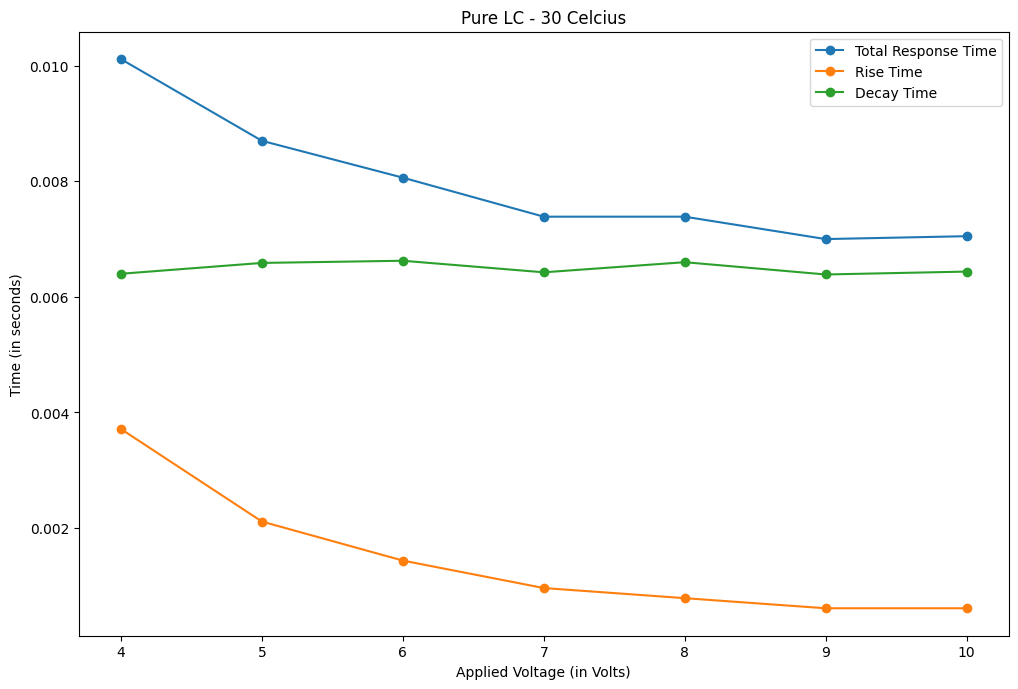

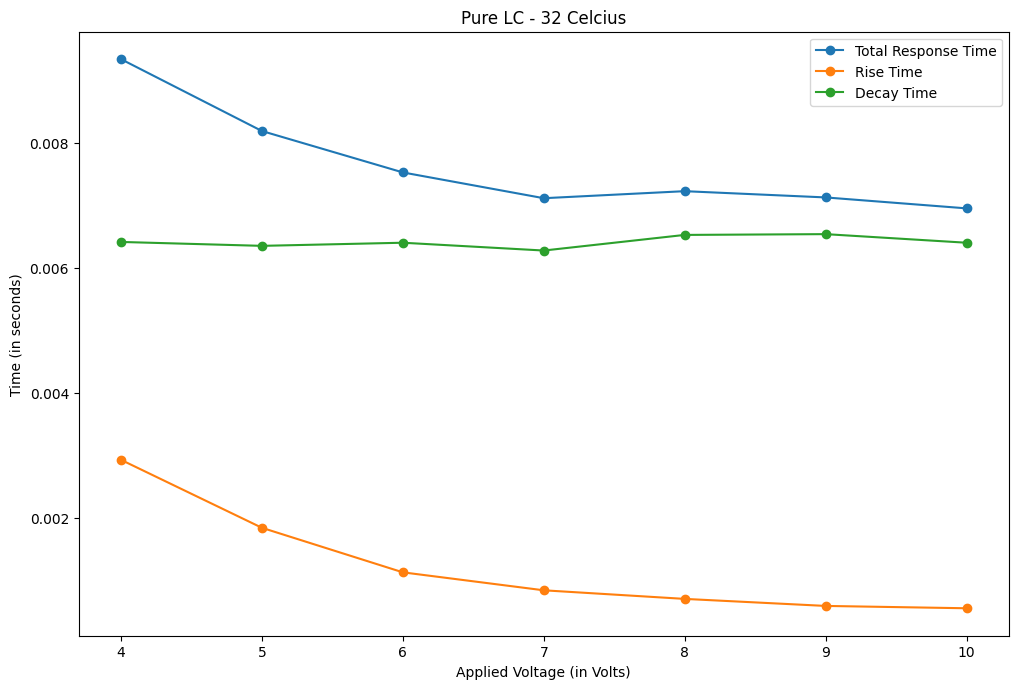

In [67]:
#Plotting the response time vs Applied Voltage
if not os.path.exists(output_path+"/ResponseTimevsTemp") :
    os.mkdir (output_path+"/ResponseTimevsTemp")
for idx,temp in enumerate(temps):
    plt.figure(1,figsize=(12, 8), dpi=100, linewidth=0.1)
    plt.ylabel("Time (in seconds)")
    plt.xlabel("Applied Voltage (in Volts)")
    plt.plot(results['Applied Voltage'][idx*len(voltages):(idx+1)*len(voltages)],results['Total Response Time'][idx*len(voltages):(idx+1)*len(voltages)],'-o')
    plt.plot(results['Applied Voltage'][idx*len(voltages):(idx+1)*len(voltages)],results['Rise Time'][idx*len(voltages):(idx+1)*len(voltages)],'-o')
    plt.plot(results['Applied Voltage'][idx*len(voltages):(idx+1)*len(voltages)],results['Decay Time'][idx*len(voltages):(idx+1)*len(voltages)],'-o')
    plt.legend(['Total Response Time','Rise Time','Decay Time'])
    plt.title(name_of_LC+" - "+temp+" Celcius")
    plt.savefig(output_path+"/ResponseTimevsTemp/"+name_of_LC+"_"+temp+".jpg", dpi=300,bbox_inches='tight')
    plt.show()


LC Name  Temperature  Applied Voltage  Rise Time  Decay Time  \
0   Pure LC           26                4   0.003950    0.005587   
7   Pure LC           28                4   0.003537    0.006225   
14  Pure LC           30                4   0.003712    0.006400   
21  Pure LC           32                4   0.002925    0.006412   
1   Pure LC           26                5   0.002662    0.006125   
8   Pure LC           28                5   0.002562    0.006575   
15  Pure LC           30                5   0.002112    0.006588   
22  Pure LC           32                5   0.001837    0.006350   
2   Pure LC           26                6   0.001775    0.006088   
9   Pure LC           28                6   0.001637    0.006362   
16  Pure LC           30                6   0.001437    0.006625   
23  Pure LC           32                6   0.001125    0.006400   
3   Pure LC           26                7   0.001125    0.005837   
10  Pure LC           28                7   0.001137

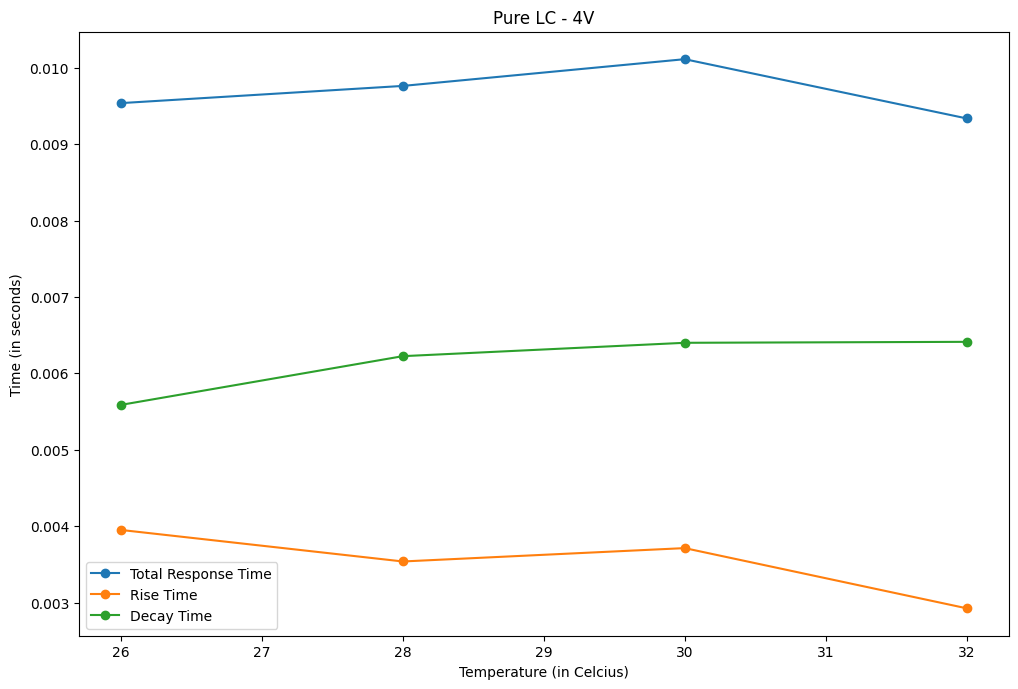

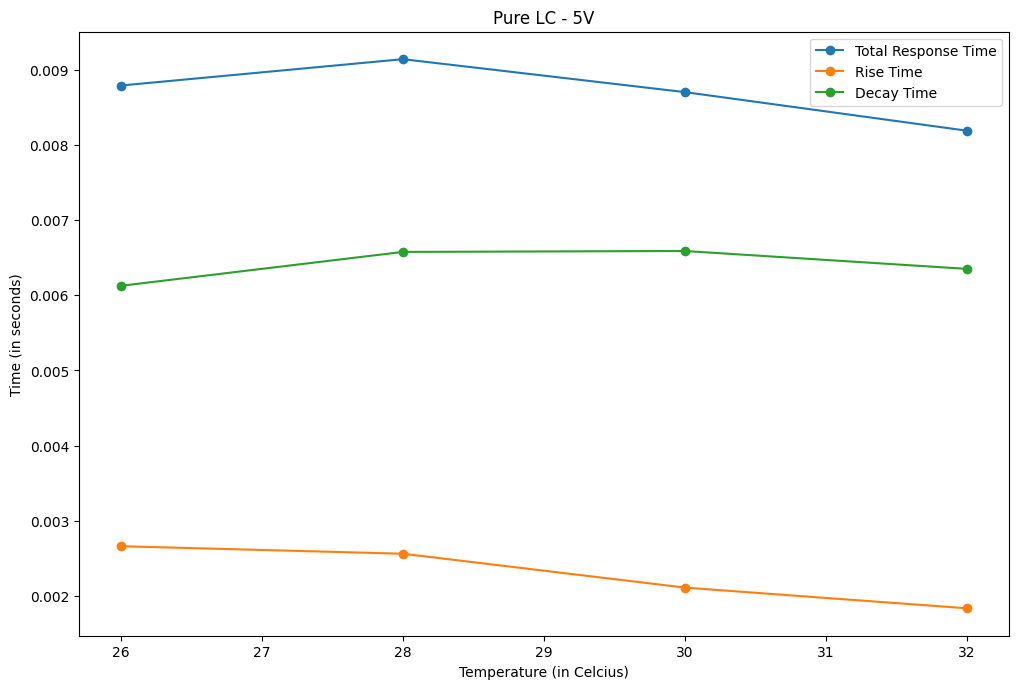

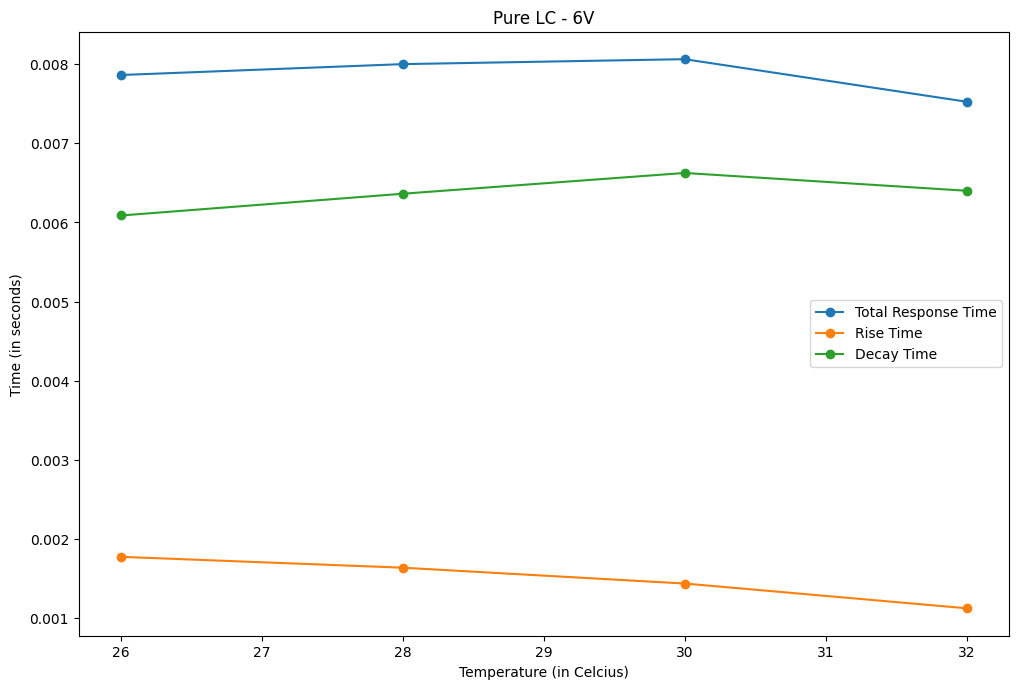

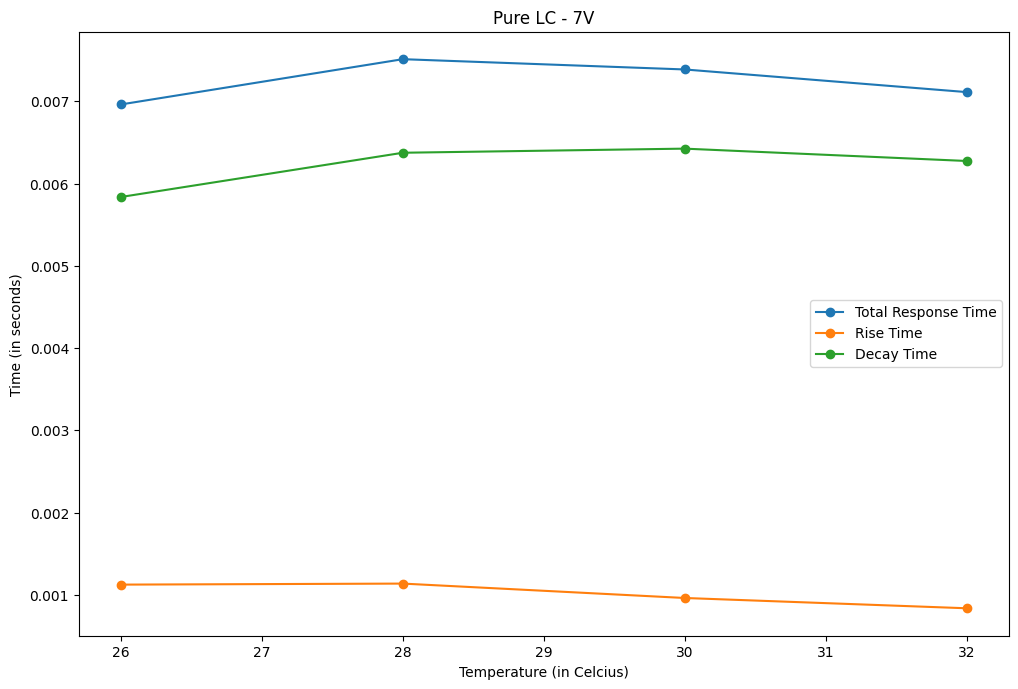

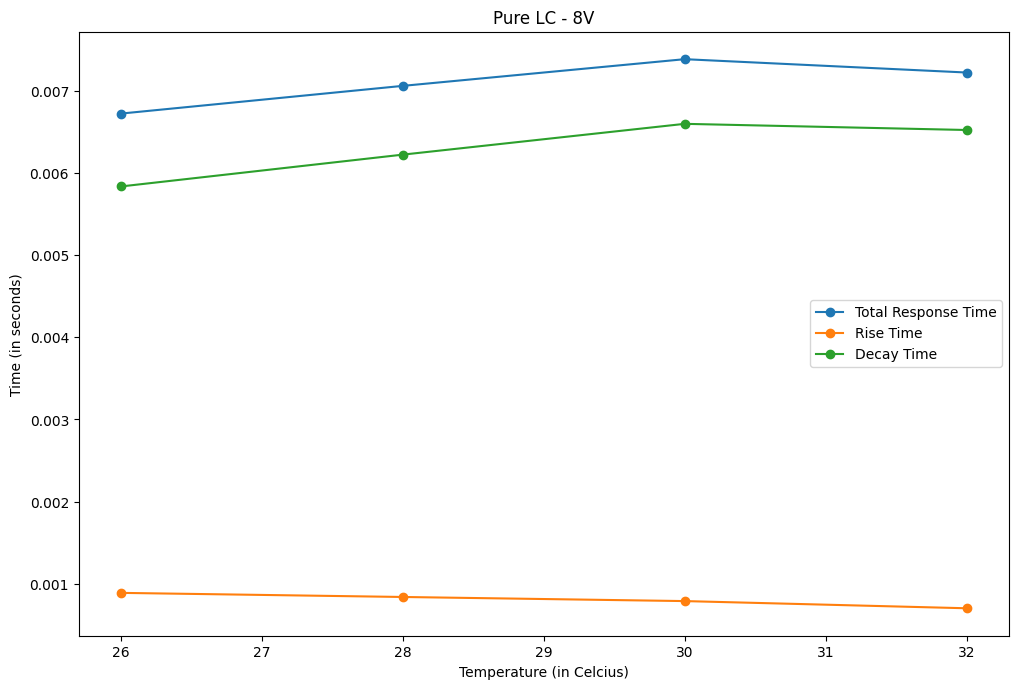

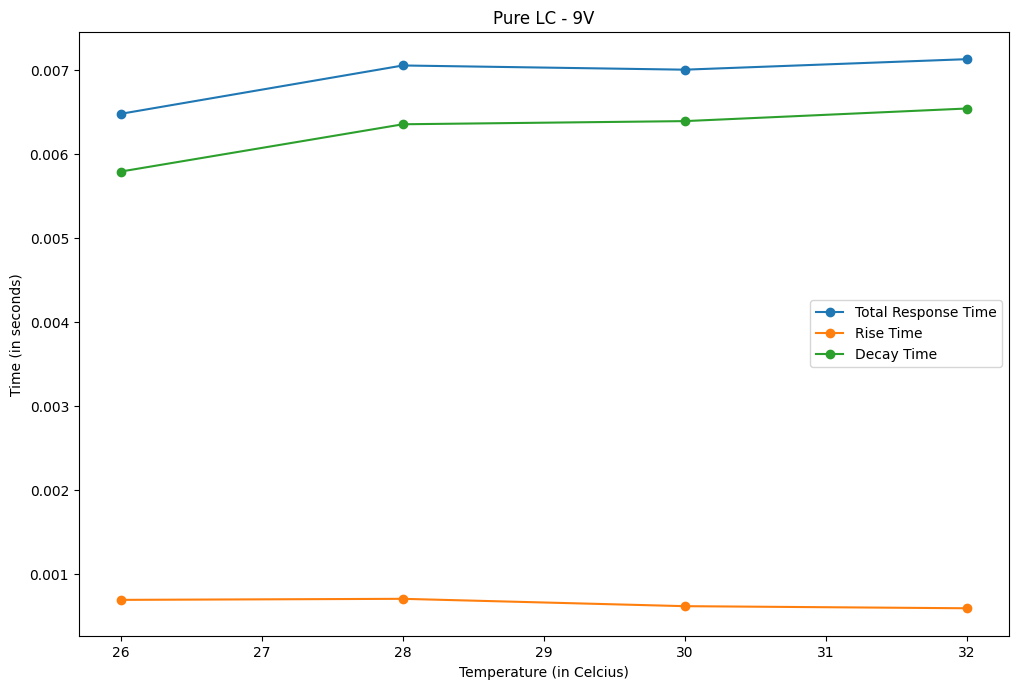

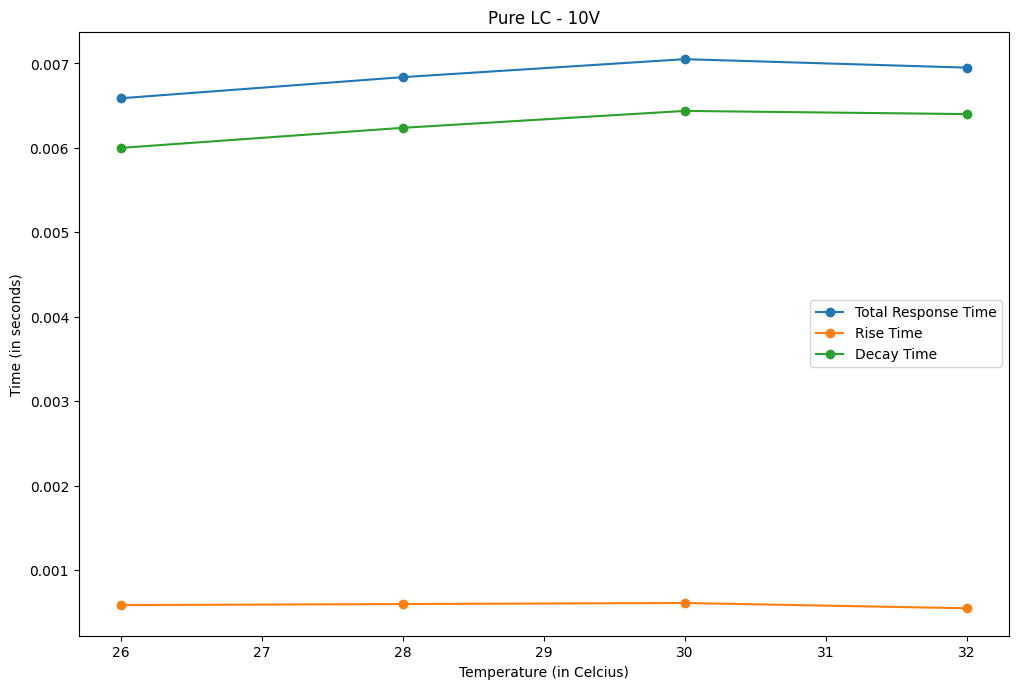

In [69]:
#Plotting the response time vs Applied Voltage
if not os.path.exists(output_path+"/ResponseTimevsVoltage") :
    os.mkdir (output_path+"/ResponseTimevsVoltage")
results1=results.sort_values(['Applied Voltage','Temperature'])
print(results1.head(20))
for idx,voltage in enumerate(voltages):
    plt.figure(1,figsize=(12, 8), dpi=100, linewidth=0.1)
    plt.ylabel("Time (in seconds)")
    plt.xlabel("Temperature (in Celcius)")
    plt.plot(results1['Temperature'][idx*len(temps):(idx+1)*len(temps)],results1['Total Response Time'][idx*len(temps):(idx+1)*len(temps)],'-o')
    plt.plot(results1['Temperature'][idx*len(temps):(idx+1)*len(temps)],results1['Rise Time'][idx*len(temps):(idx+1)*len(temps)],'-o')
    plt.plot(results1['Temperature'][idx*len(temps):(idx+1)*len(temps)],results1['Decay Time'][idx*len(temps):(idx+1)*len(temps)],'-o')
    plt.legend(['Total Response Time','Rise Time','Decay Time'])
    plt.title(name_of_LC+" - "+voltage+"V")
    plt.savefig(output_path+"/ResponseTimevsVoltage/"+name_of_LC+"_"+voltage+"V.jpg", dpi=300,bbox_inches='tight')
    plt.show()

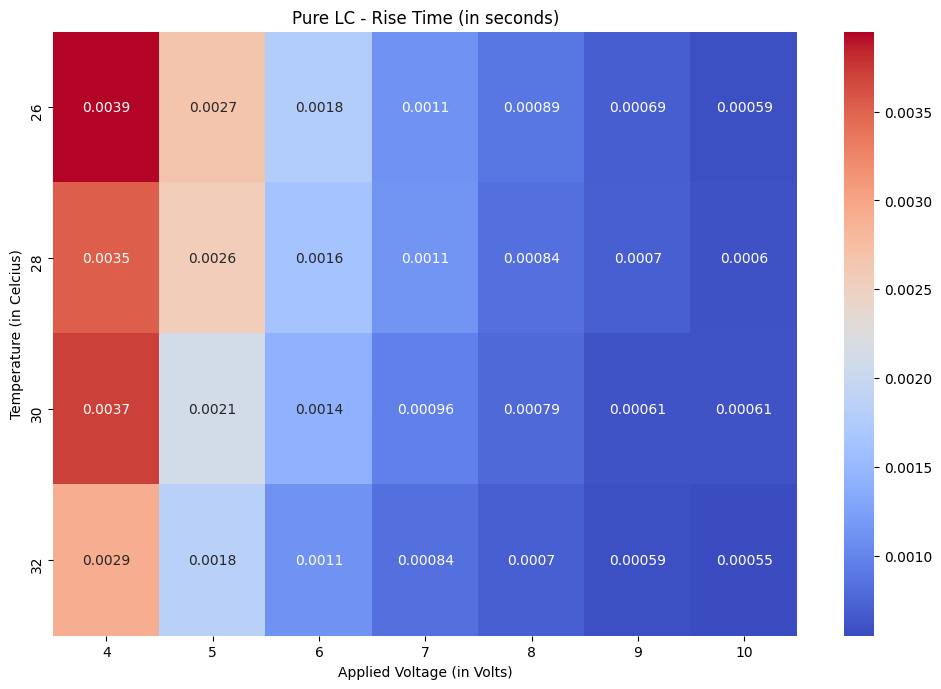

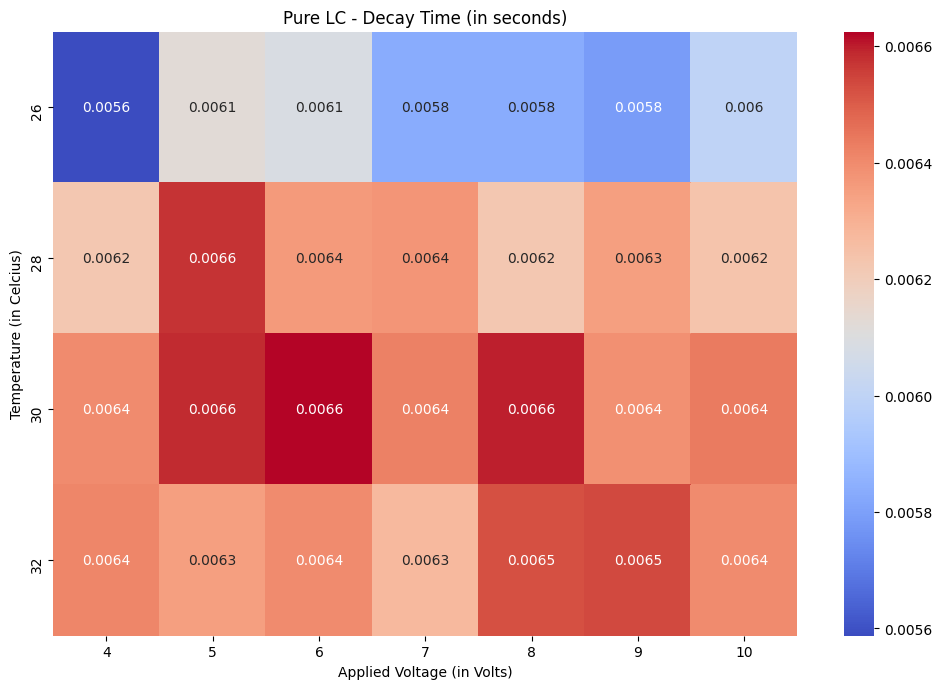

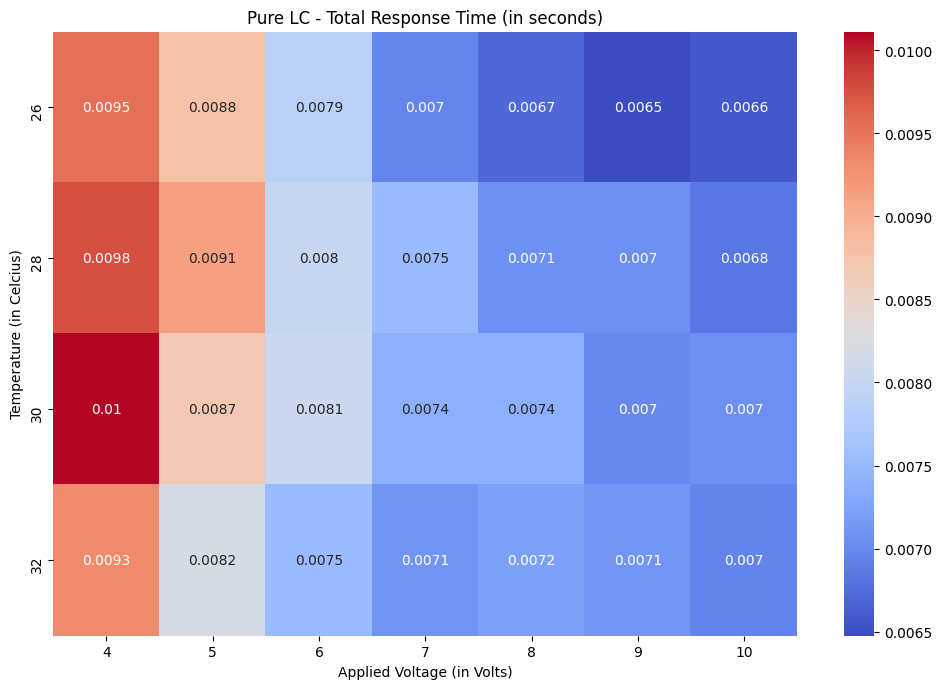

In [73]:
titles=['Rise Time','Decay Time','Total Response Time']
if not os.path.exists(output_path+"/ResponseTimeMap") :
    os.mkdir (output_path+"/ResponseTimeMap")
for title in titles:
    plt.figure(1,figsize=(12, 8), dpi=100, linewidth=0.1)
    teste = np.resize(results[title].to_numpy(copy=True),(len(temps),len(voltages)))
    tas=pd.DataFrame(teste,temps,voltages)
    sns.heatmap(tas, annot=True,cmap='coolwarm')
    plt.xlabel("Applied Voltage (in Volts)")
    plt.ylabel("Temperature (in Celcius)")
    plt.title(name_of_LC+" - "+title+" (in seconds)")
    plt.savefig(output_path+"/ResponseTimeMap/"+name_of_LC+"_"+title+".jpg", dpi=300,bbox_inches='tight')
    plt.show()


# Analysing properties of the Liquid Crystal

In [27]:
#Setting up dataframe for recording derived properties 
properties=pd.DataFrame(columns = ['Property', 'Value', 'Units'])

In [33]:


try :
    results=pd.read_csv(output_path+"/"+"RespTimevsAppVolt.csv")
except :
  print ("Incorrect CSV directory or filename")
  exit(1)
else:
    print("File Exists. Further calculations allowed")


File Exists. Further calculations allowed


In [29]:
# Rotational_Viscosity/Combined_Elastic_Constant Analysis
prop="Gamma/K"
value=results['Decay Time'].mean()*pi**2/thickness**2
units="s/m^2"
print("Visco-elastic ratio(gamma/K) = "+str(value)+" "+units)


Rotational_Viscosity/Combined_Elastic_Constant (gamma/K) = 1304424608.9519699 s/m^2


In [30]:
#If the above Property is fine, append the property to list of properties
properties=properties.append({'Property':prop, 'Value':value, 'Units':units},ignore_index=True)
properties.tail()

In [32]:
# If all the properties are fine, write out the properties to a csv file
properties.to_csv(output_path+"/"+"Derived_Properties.csv", index=False)

In [14]:
#Reading the datafile containing the Threshold Voltage data
vthdata=pd.read_csv(path+"/Vth.csv",skiprows=0)
#Normalizing Voltage
vthdata['Intensity']=(vthdata['Intensity']-vthdata['Intensity'].min())/(vthdata['Intensity'].max()-vthdata['Intensity'].min())
temp=32

vthdata.describe()

Voltage   Intensity
count  105.000000  105.000000
mean     4.130476    0.601167
std      2.944487    0.325692
min      0.100000    0.000000
25%      1.820000    0.285221
50%      3.300000    0.696377
75%      5.900000    0.917194
max     12.000000    1.000000

Threshold Votage:3.8V


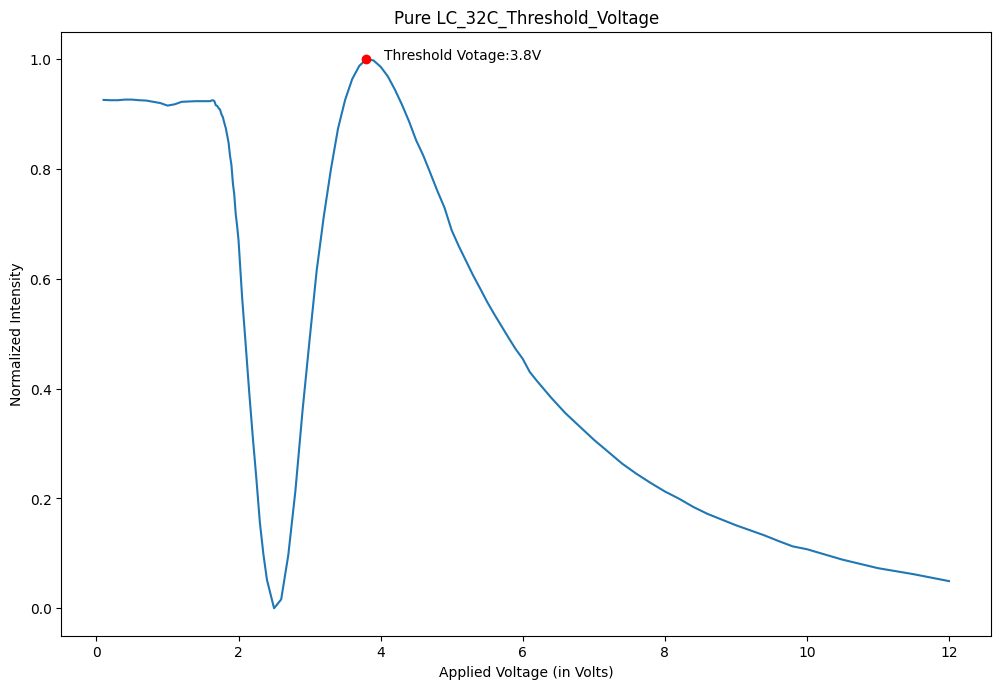

In [5]:
#Plotting the normalized intensity vs voltage data
plt.figure(2,figsize=(12, 8), dpi=100, linewidth=0.1)
plt.ylabel("Normalized Intensity")
plt.xlabel("Applied Voltage (in Volts)")
plt.plot(vthdata['Voltage'],vthdata['Intensity'])
indx_max = np.argmax(vthdata['Intensity'])
plt.plot(vthdata['Voltage'][indx_max], vthdata['Intensity'][indx_max], 'ro')
vth=vthdata['Voltage'][indx_max]
#plt.plot(vth*np.ones(2),[1,vthdata['Intensity'][indx_max]])
plt.annotate("Threshold Votage:"+ str(vth)+'V',(vthdata['Voltage'][indx_max], vthdata['Intensity'][indx_max]),xytext=(vthdata['Voltage'][indx_max]+0.25, vthdata['Intensity'][indx_max]))
print("Threshold Votage:"+ str(vth)+'V')
plt.title(name_of_LC+"_32C_"+"Threshold_Voltage")
plt.savefig(output_path+"/"+name_of_LC+"_"+"Threshold_Voltage.jpg", dpi=300,bbox_inches='tight')
plt.show()

Max Birefrigence:0.04514978601997147V


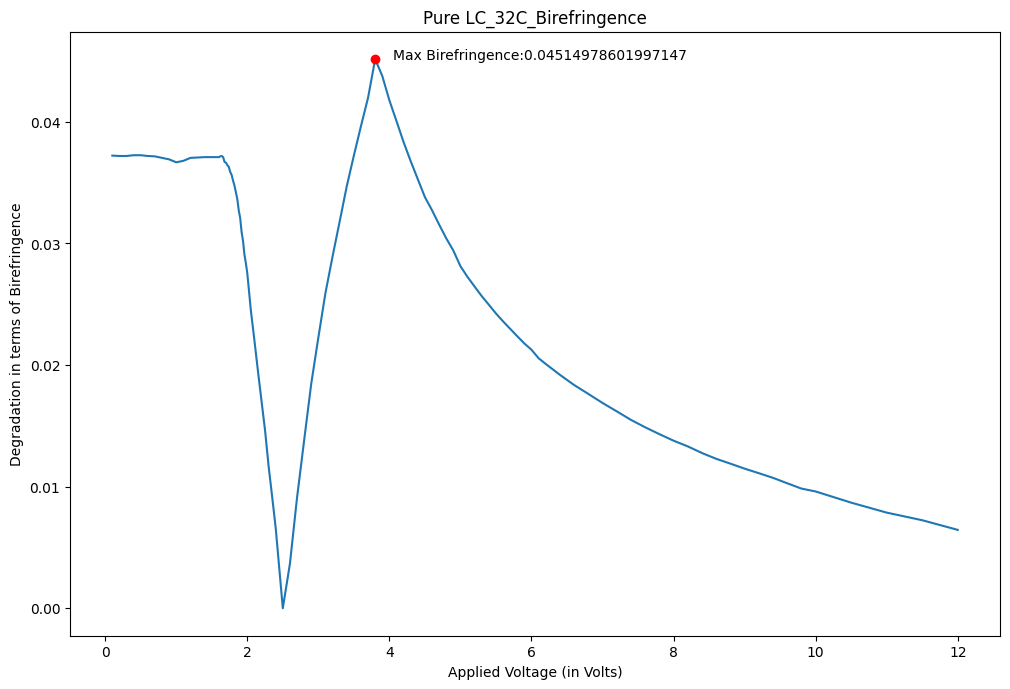

In [26]:
#FInding the birefringence from the Intensity vs Voltage Data
#Threshold Voltage depends on temperature of material
plt.figure(2,figsize=(12, 8), dpi=100, linewidth=0.1)
plt.ylabel("Degradation in terms of Birefringence")
plt.xlabel("Applied Voltage (in Volts)")
biref=np.arccos(1-vthdata['Intensity']*2)/2/pi/thickness*wavelength
plt.plot(vthdata['Voltage'],biref)

indx_max = np.argmax(biref)
plt.plot(vthdata['Voltage'][indx_max], biref[indx_max], 'ro')
b=biref[indx_max]
#plt.plot(vth*np.ones(2),[1,vthdata['Intensity'][indx_max]])
plt.annotate("Max Birefringence:"+ str(b),(vthdata['Voltage'][indx_max], biref[indx_max]),xytext=(vthdata['Voltage'][indx_max]+0.25, biref[indx_max]))
print("Max Birefrigence:"+ str(b)+'V')

plt.title(name_of_LC+"_32C_"+"Birefringence")
plt.savefig(output_path+"/"+name_of_LC+"_"+"Birefringence.jpg", dpi=300,bbox_inches='tight')
plt.show()

In [27]:
#Calculating K from Threshold Voltage
#K depends on temperature
k_by_dielectric_anisotropy=(vth*2/pi)**2*epsilon
print("Combined elastic constant K divided by dielectric anisotropy "+"at temp "+str(temp)+" celcius = "+str(k))

Combined elastic constant K divided by dielectric anisotropy at temp 32 celcius = 5.181746575484629e-11


In [41]:
gamma_by_DA=[]
for i in range(21,28):
    gamma_by_DA.append(results['Rise Time'][i]*epsilon/thickness**2*(vth-results['Applied Voltage'][i]))
print(gamma_by_DA)

[-0.00010540678326841021, -0.0003973024907807143, -0.0004459517753657557, -0.00048288919514402525, -0.0005297366543747643, -0.0005504576459574868, -0.0006144224460603063]
